# Data and Setup

In [1]:
%%capture
# Importing required libraries
import pandas as pd
import numpy as np

# Viz libraries and style setting
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Set the palette to the "pastel" default palette:
sns.set_palette("pastel")

In [2]:
lgCan = pd.read_csv('https://raw.githubusercontent.com/Kenyaokun/Practicum_IBM/main/3.28%20-%204.04%20Update/lung_cancer_all_dummified.csv')

In [3]:
lgCan

,Study ID,Cancer Type Detailed,Sex,Age,Smoking Status,Mutation Count,Fraction Genome Altered,Overall Survival Status,Overall Survival (Months)
0,1,1,0,70,0,0,0.4565,0,0.00
1,1,1,0,81,0,0,0.0000,0,23.98
2,1,1,0,67,0,289,0.2221,0,50.03
3,1,1,1,79,0,0,0.2362,1,3.98
4,1,1,0,68,0,1272,0.0854,0,19.94
...,...,...,...,...,...,...,...,...,...
2559,3,1,1,75,1,211,0.2382,1,43.91
2560,3,1,0,63,1,101,0.5420,1,8.59
2561,3,1,1,71,1,216,0.4405,1,11.18
2562,3,2,1,68,1,109,0.0598,0,4.00


# Preparing Data 

In [4]:
# Standardizing Column names
lgCan.columns = lgCan.columns.str.replace(' ', '_') # replacing spaces (' ') with  underscore.
lgCan.columns = lgCan.columns.str.replace('-', '_') # replacing hyphens ('-') with underscore
lgCan.columns = lgCan.columns.str.replace('(', '') # Removing '('
lgCan.columns = lgCan.columns.str.replace(')', '') # Removing ')'
lgCan.columns= lgCan.columns.str.lower() # converting column names to lower case

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [5]:
# Dropping unwanted columns - Creating data for Survival Classification 
lgCanClf = lgCan.drop(['study_id','overall_survival_months'], axis = 1)

# Dropping unwanted columns - Creating data for Survival Time prediction  
lgCanReg = lgCan.drop(['study_id','overall_survival_status'], axis = 1)

# Neural network

In [6]:
from sklearn.metrics import accuracy_score
import tensorflow as tf

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, GlobalAveragePooling2D
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3, Xception
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [7]:
from sklearn.model_selection import train_test_split

y = lgCanClf['overall_survival_status'] 
X = lgCanClf.loc[:, lgCanClf.columns != 'overall_survival_status']

# Splitting Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Setting parameters
n_features = X_train.shape[1]
n_class = len(np.unique(y))

In [10]:
n_class

2

# Model 1

In [38]:
# define the keras model
model = Sequential()
model.add(Dense(2056, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1028, activation='relu'))
model.add(Dense(514, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=2)

# evaluate on test set
yhat = model.predict(X_test)
yhat = np.argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Epoch 1/30
57/57 - 3s - loss: 8.8597 - 3s/epoch - 55ms/step
Epoch 2/30
57/57 - 2s - loss: 0.6662 - 2s/epoch - 26ms/step
Epoch 3/30
57/57 - 2s - loss: 0.9826 - 2s/epoch - 27ms/step
Epoch 4/30
57/57 - 2s - loss: 0.5716 - 2s/epoch - 26ms/step
Epoch 5/30
57/57 - 2s - loss: 0.5773 - 2s/epoch - 26ms/step
Epoch 6/30
57/57 - 2s - loss: 0.5718 - 2s/epoch - 27ms/step
Epoch 7/30
57/57 - 2s - loss: 0.5644 - 2s/epoch - 27ms/step
Epoch 8/30
57/57 - 2s - loss: 0.5664 - 2s/epoch - 26ms/step
Epoch 9/30
57/57 - 2s - loss: 0.5710 - 2s/epoch - 27ms/step
Epoch 10/30
57/57 - 2s - loss: 0.5582 - 2s/epoch - 27ms/step
Epoch 11/30
57/57 - 2s - loss: 0.5762 - 2s/epoch - 27ms/step
Epoch 12/30
57/57 - 2s - loss: 0.5653 - 2s/epoch - 27ms/step
Epoch 13/30
57/57 - 2s - loss: 0.5626 - 2s/epoch - 27ms/step
Epoch 14/30
57/57 - 2s - loss: 0.5577 - 2s/epoch - 26ms/step
Epoch 15/30
57/57 - 2s - loss: 0.5859 - 2s/epoch - 27ms/step
Epoch 16/30
57/57 - 2s - loss: 0.5663 - 2s/epoch - 26ms/step
Epoch 17/30
57/57 - 2s - loss: 0.

# Model 2

In [48]:
from tensorflow import keras

model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(6,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_2.fit(X_train, y_train, epochs=30, batch_size=1)
test_loss, test_acc = model_2.evaluate(X_test, y_test)

Epoch 1/30
1794/1794 [==============================] - 3s 1ms/step - loss: 1.2599 - accuracy: 0.6784
Epoch 2/30
1794/1794 [==============================] - 2s 1ms/step - loss: 0.8207 - accuracy: 0.6895
Epoch 3/30
1794/1794 [==============================] - 2s 1ms/step - loss: 0.7416 - accuracy: 0.6884
Epoch 4/30
1794/1794 [==============================] - 2s 1ms/step - loss: 0.7168 - accuracy: 0.7057
Epoch 5/30
1794/1794 [==============================] - 2s 1ms/step - loss: 0.6866 - accuracy: 0.7090
Epoch 6/30
1794/1794 [==============================] - 2s 1ms/step - loss: 0.6221 - accuracy: 0.7140
Epoch 7/30
1794/1794 [==============================] - 2s 1ms/step - loss: 0.6386 - accuracy: 0.7168
Epoch 8/30
1794/1794 [==============================] - 2s 1ms/step - loss: 0.5799 - accuracy: 0.7263
Epoch 9/30
1794/1794 [==============================] - 2s 1ms/step - loss: 0.5877 - accuracy: 0.7163
Epoch 10/30
1794/1794 [==============================] - 2s 1ms/step - loss: 0.579

# Model Evaluation  - Tuned RF model

Reference-  [Link](https://www.ritchieng.com/machine-learning-evaluate-classification-model/)

In [43]:
# store the predicted probabilities for class 1
y_pred_prob=model_2.predict(X_test)

# make class predictions for the testing set
y_pred_class=np.argmax(y_pred_prob,axis=1)

Text(0, 0.5, 'Frequency')

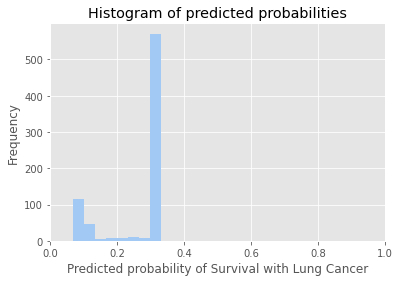

In [45]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Survival with Lung Cancer')
plt.ylabel('Frequency')

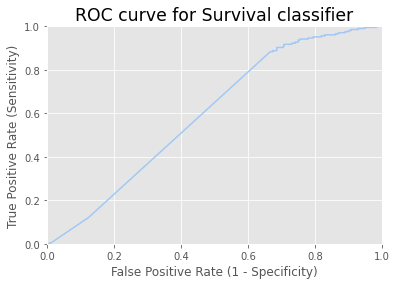

In [46]:
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Survival classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[539  25]
 [ 98 108]]


In [ ]:
print("Precision score on the Test set: {:.3f}".format(metrics.precision_score(y_test, y_pred_class)))

Precision score on the Test set: 0.812


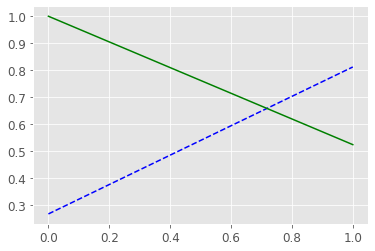

In [ ]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, y_pred_class)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")

plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.show()
